## Used Cars with Trees, Random Forests, Boosting, and Neural Nets

Let’s try a single tree, random forests, boosting, and neural nets on the cars data with y = price and x= (mileage,year).

Let’s do a simple train/test split and compare the methods based on rmse on the test data.

For each method I’ll show you code to implement the method in R and then ask you to try a simple modification.

## Basic Imports and Read in the Data

We use the same data and train/test split for each method.

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##sklearn model selection
from sklearn.model_selection import train_test_split

## scale the x variables when there is more than one
from sklearn.preprocessing import StandardScaler

def myrmse(y,yhat):
   """ print out rmse with 3 digits"""
   #rmse = math.sqrt(mean_squared_error(y,yhat))
   rmse = np.sqrt(np.sum((y-yhat)**2)/len(y))
   return(np.round(rmse,3))

In [2]:
cd = pd.read_csv("https://bitbucket.org/remcc/rob-data-sets/downloads/susedcars.csv")
cds = cd[['price','mileage','year']]
cds = cds.astype('float64')  # cd read the data in as integer
cds['price'] = cds['price']/1000.0
cds['mileage'] = cds['mileage']/1000.0
print(cds.head())

    price  mileage    year
0  43.995   36.858  2008.0
1  44.995   46.883  2012.0
2  25.999  108.759  2007.0
3  33.880   35.187  2007.0
4  34.895   48.153  2007.0


In [3]:
X = cds[['mileage','year']].to_numpy()  #mileage and year columns as a numpy array
print("*** type of X is",type(X))
print(X.shape) #number of rows and columns
print(X[0:4,:]) #first 4 rows
y = cds['price'].values #price as a numpy vector
print(f'length of y is {len(y)}')
print(y[:4]) #implicit start at 0

*** type of X is <class 'numpy.ndarray'>
(1000, 2)
[[  36.858 2008.   ]
 [  46.883 2012.   ]
 [ 108.759 2007.   ]
 [  35.187 2007.   ]]
length of y is 1000
[43.995 44.995 25.999 33.88 ]


In [4]:
#train/test split

myseed = 88 #Nylander
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,random_state=myseed, test_size=.3)

print(f'train sample size is {ytrain.shape[0]}\n')
print(f'test sample size is {ytest.shape[0]}\n')

train sample size is 700

test sample size is 300



## Single Tree  

See the link "simple tree in python" on the webpage.  

Note that in sklearn.DecisionTreeRegressor, the process creates a new pruned tree rather than modifying the existing one. In scikit-learn, you can't directly prune an already fitted tree object - you need to create a new tree with the appropriate complexity parameter.

Below I fit a single tree to the data two different ways.  

To get ypredT is just asked for 20 bottom nodes (max_leaf_nodes=20).  

To get ypredT2 I tried looping over different cost complexity pruning values to see what worked best.  This gave me a tree with 12 bottom nodes.  

Try using the the first simple approach but with a smaller tree.  
That is, just try something like tmod = DecisionTreeRegressor(max_leaf_nodes=10)  and see what kind of rmse you get on ytest.  

In [5]:
##sklearn learners
from sklearn.tree import DecisionTreeRegressor

In [6]:
# tree with at most 20 bottom nodes
tmod = DecisionTreeRegressor(max_leaf_nodes=20)
tmod.fit(Xtrain,ytrain)
ypredT = tmod.predict(Xtest)

number of bottom  nodes:  20


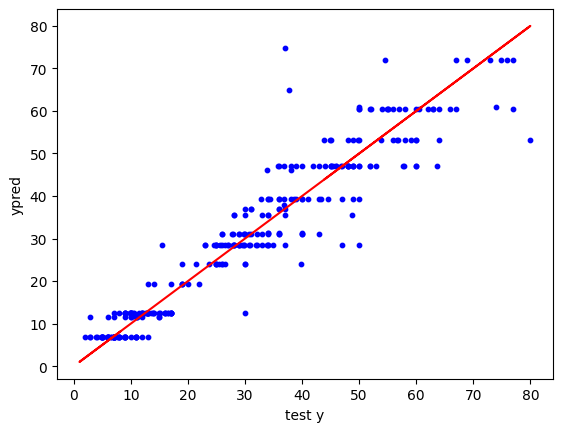

In [7]:
plt.scatter(ytest,ypredT,c='blue',s=10)
plt.xlabel('test y'); plt.ylabel('ypred')
plt.plot(y,y,c='red')
print("number of bottom  nodes: ",pd.Series(ypredT).nunique())

In [8]:
rmseT  = myrmse(ypredT,ytest)
print(f'rmse for tree is {rmseT}\n')
np.sqrt(np.sum((ypredT-ytest)**2)/len(ytest))

rmse for tree is 6.132



np.float64(6.132076255505384)

Now I'll try the other approach where I try a variety of alphas (the cost complexity parameter in sklearn).  


In [9]:
# Create a full tree first
dt_regressor = DecisionTreeRegressor(random_state=42,max_leaf_nodes=100)
dt_regressor.fit(Xtrain, ytrain)

# Get the path for various alpha values (complexity parameter)
path = dt_regressor.cost_complexity_pruning_path(Xtrain, ytrain)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [10]:
# Create trees with different alphas and evaluate
best_score = -float('inf')
best_alpha = 0
best_model = None

for ccp_alpha in ccp_alphas:
    dt = DecisionTreeRegressor(ccp_alpha=ccp_alpha, random_state=42)
    dt.fit(Xtrain, ytrain)
    score = dt.score(Xtest, ytest)

    if score > best_score:
        best_score = score
        best_alpha = ccp_alpha
        best_model = dt

In [11]:
# Use the best pruned model
final_model = DecisionTreeRegressor(ccp_alpha=best_alpha, random_state=42)
final_model.fit(Xtrain, ytrain)
ypredT2 = final_model.predict(Xtest)

In [12]:
rmseT2  = np.sqrt(np.sum((ypredT2-ytest)**2)/len(ytest))
print(f'rmse for tree is {rmseT2}\n')

print(f'best alpha: {best_alpha}\n')

rmse for tree is 5.643184274686354

best alpha: 1.0472302073566349



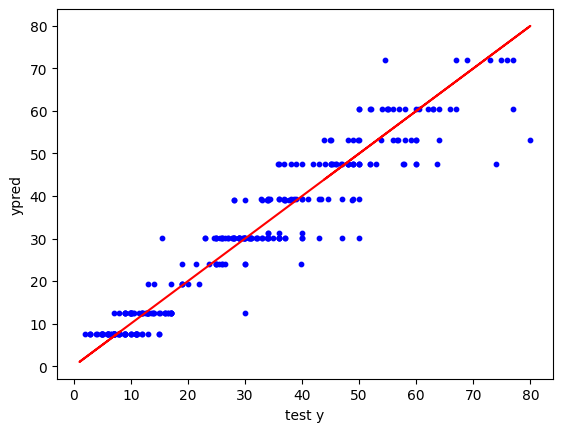

number of bottom  nodes:  12


In [13]:
plt.scatter(ytest,ypredT2,c='blue',s=10)
plt.xlabel('test y'); plt.ylabel('ypred')
plt.plot(y,y,c='red')
plt.show()
print("number of bottom  nodes: ",pd.Series(ypredT2).nunique())

## Random Forests  

See the link " Random Forests and Gradient Boosting on the California Housing Data in python" on the webpage.

Below I used random forests.  

Try n_estimators = 1000.  

In [14]:
### sklearn model
from sklearn.ensemble import RandomForestRegressor

In [15]:
## fit rf on train, predict on val
# use 500 trees and 2 x's
#rfm = RandomForestRegressor(random_state=34,n_jobs=-1,n_estimators=500,max_features=2)
rfm = RandomForestRegressor(n_estimators=500,random_state=34)
rfm.fit(Xtrain,ytrain) # fit on train
## predict on val
ypredRF = rfm.predict(Xtest)

rmse from rf:  5.596


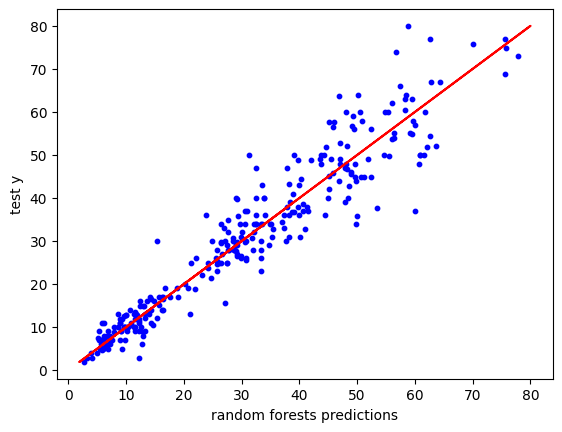

In [16]:
plt.scatter(ypredRF,ytest,c='blue',s=10)
plt.plot(ytest,ytest,c='red')
plt.xlabel('random forests predictions');plt.ylabel('test y')

print('rmse from rf: ',myrmse(ytest,ypredRF))

## Boosting  

See the link " Random Forests and Gradient Boosting on the California Housing Data in python" on the webpage.  

Below are boosting results.  

Try n_estimators = 5000.  Should this make it worse or better !!??

In [17]:
from sklearn.ensemble import GradientBoostingRegressor

### try boosting## plot boosting prediction on val
gbm = GradientBoostingRegressor(learning_rate=.05,n_estimators=500,max_depth=2,random_state=34)
gbm.fit(Xtrain,ytrain)
ypredB = gbm.predict(Xtest)

boosting rmse: 5.323


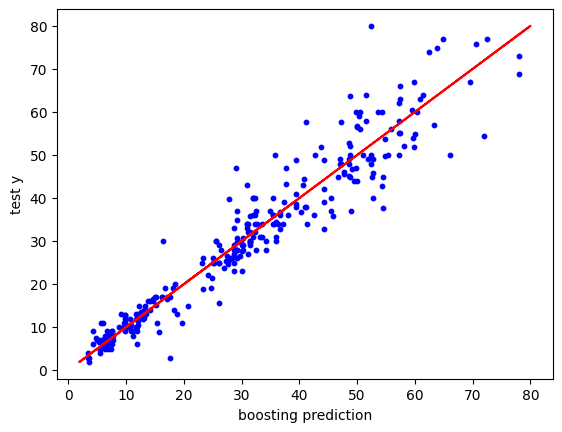

In [18]:
## plot boosting prediction on val
plt.scatter(ypredB,ytest,c='blue',s=10)
plt.plot(ytest,ytest,c='red')
plt.xlabel('boosting prediction');plt.ylabel('test y')

print(f'boosting rmse: {myrmse(ypredB,ytest)}')

## Neural Networks  

Below I used pytorch fit a neural net model.  

See the links under "pytorch example with susedcars data" on the webpage.

I did 5000 epochs.  
Do I really need that many?   

Try running if for few epochs and see if you still get decent results.

In [19]:
### pytorch
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch import nn

In [20]:
##################################################
## scale both x and y, in principle you don't have to scale y
sc = StandardScaler()
xtr = sc.fit_transform(Xtrain)
xte = sc.transform(Xtest)

scy = StandardScaler()
ytr = scy.fit_transform(ytrain.reshape(-1,1))
yte = scy.transform(ytest.reshape(-1,1))

print(xtr.shape)
print(ytr.shape)
print(xte.shape)
print(yte.shape)

(700, 2)
(700, 1)
(300, 2)
(300, 1)


torch.Size([700, 2])
torch.float32
torch.Size([700, 1])
torch.float32
torch.float32


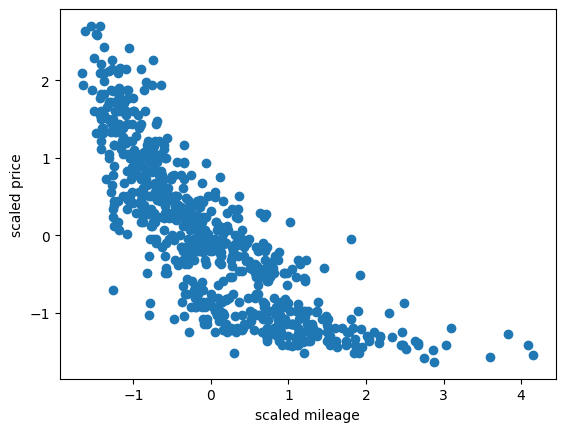

In [21]:
##################################################
## move to Tensors

xtr = xtr.astype('float32')
xxtr = torch.from_numpy(xtr)
ytr = ytr.astype('float32')
yytr = torch.from_numpy(ytr)

xte = xte.astype('float32')
xxte = torch.from_numpy(xte)
yte = yte.astype('float32')
yyte = torch.from_numpy(yte)

plt.scatter(xxtr[:,0],yytr)
plt.xlabel('scaled mileage'); plt.ylabel('scaled price')

print(xxtr.shape)
print(xxtr.dtype)
print(yytr.shape)
print(yytr.dtype)
print(yyte.dtype)

In [22]:
##################################################
## Dataset

class DF(Dataset):
   def __init__(self,x,y,transform=None, target_transform=None):
      self.x = x
      self.y = y
      self.transform = transform
      self.target_transform = target_transform

   def __len__(self):
      return len(self.y)

   def __getitem__(self,idx):
      return self.x[idx], self.y[idx]


tDF = DF(xxtr,yytr)

In [23]:
##################################################
## DataLoader
tdl = DataLoader(tDF,batch_size=50,shuffle=True)

In [24]:
##################################################
## model

class SLNN(nn.Module):
   def __init__(self,nunits=5):
      super(SLNN, self).__init__()
      self.SSM = nn.Sequential(
         nn.Linear(2,nunits),
         nn.ReLU(),
         nn.Linear(nunits,1))
   def forward(self,x):
      yhat = self.SSM(x)
      return yhat

nunits= 50
model = SLNN(nunits)

## see model
print(model)

SLNN(
  (SSM): Sequential(
    (0): Linear(in_features=2, out_features=50, bias=True)
    (1): ReLU()
    (2): Linear(in_features=50, out_features=1, bias=True)
  )
)


In [25]:
##################################################
### do it
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    return loss_fn(model(dataloader.dataset.x),dataloader.dataset.y).item()



learning_rate = .05
l2par = .0

loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay = l2par)

In [26]:
epochs = 5000
lv = np.zeros((epochs,))
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    lv[t] = train_loop(tdl, model, loss_fn, optimizer)
print("Done!")

Streaming output truncated to the last 5000 lines.
-------------------------------
Epoch 2502
-------------------------------
Epoch 2503
-------------------------------
Epoch 2504
-------------------------------
Epoch 2505
-------------------------------
Epoch 2506
-------------------------------
Epoch 2507
-------------------------------
Epoch 2508
-------------------------------
Epoch 2509
-------------------------------
Epoch 2510
-------------------------------
Epoch 2511
-------------------------------
Epoch 2512
-------------------------------
Epoch 2513
-------------------------------
Epoch 2514
-------------------------------
Epoch 2515
-------------------------------
Epoch 2516
-------------------------------
Epoch 2517
-------------------------------
Epoch 2518
-------------------------------
Epoch 2519
-------------------------------
Epoch 2520
-------------------------------
Epoch 2521
-------------------------------
Epoch 2522
-------------------------------
Epoch 2523
---

Text(0.5, 0, 'epoch')

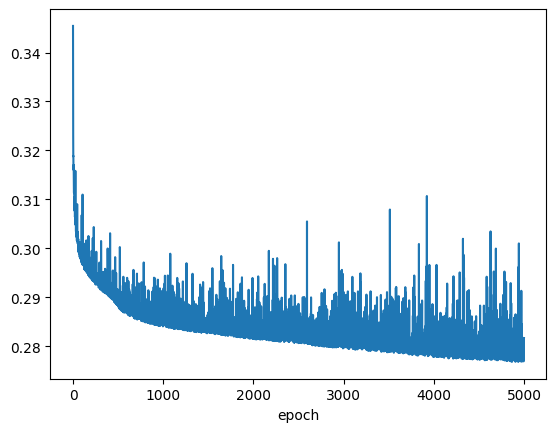

In [27]:
## plot loss over epochs
plt.plot(np.sqrt(lv))
plt.xlabel('epoch')

In [28]:
### out of sample
ypredN = model(xxte).detach().numpy()
ypredN = ypredN.astype('float64')
ypredN = scy.inverse_transform(ypredN)
ypredN = ypredN.flatten()
print(type(ypredN))
print(ypredN.shape)
print(ypredN.dtype)

<class 'numpy.ndarray'>
(300,)
float64


neural net rmse: 5.204


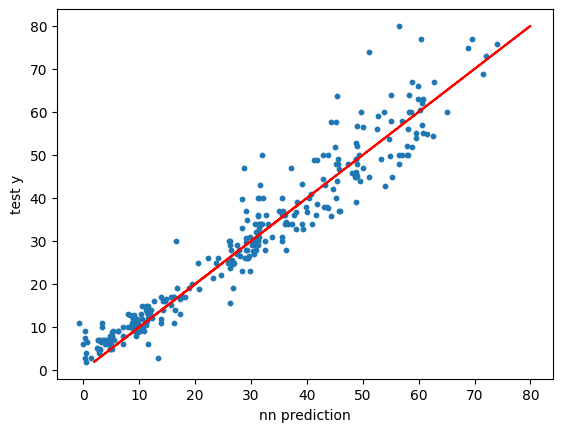

In [29]:
plt.scatter(ypredN,ytest,s=10)
plt.plot(ytest,ytest,c='red')
plt.xlabel('nn prediction'); plt.ylabel('test y')

print(f'neural net rmse: {myrmse(ypredN,ytest)}')

## Compare  

Let's compare the results from a single tree, random forests, boosting, and neural nets.  


In [30]:
## compare boosting to rf
ypredDF = pd.DataFrame({'ytest':ytest,'ypredT2':ypredT2,'ypredRF':ypredRF,'ypredB':ypredB,'ypredN':ypredN})
print(ypredDF.corr())


print('\n\nrmse: tree, rf, gb, nn:', myrmse(ypredT2,ytest),myrmse(ytest,ypredRF),myrmse(ytest,ypredB),myrmse(ytest,ypredN))

            ytest   ypredT2   ypredRF    ypredB    ypredN
ytest    1.000000  0.953870  0.954808  0.959067  0.962759
ypredT2  0.953870  1.000000  0.978637  0.982507  0.985885
ypredRF  0.954808  0.978637  1.000000  0.988320  0.987933
ypredB   0.959067  0.982507  0.988320  1.000000  0.992169
ypredN   0.962759  0.985885  0.987933  0.992169  1.000000


rmse: tree, rf, gb, nn: 5.643 5.596 5.323 5.204


In [31]:
import seaborn as sns

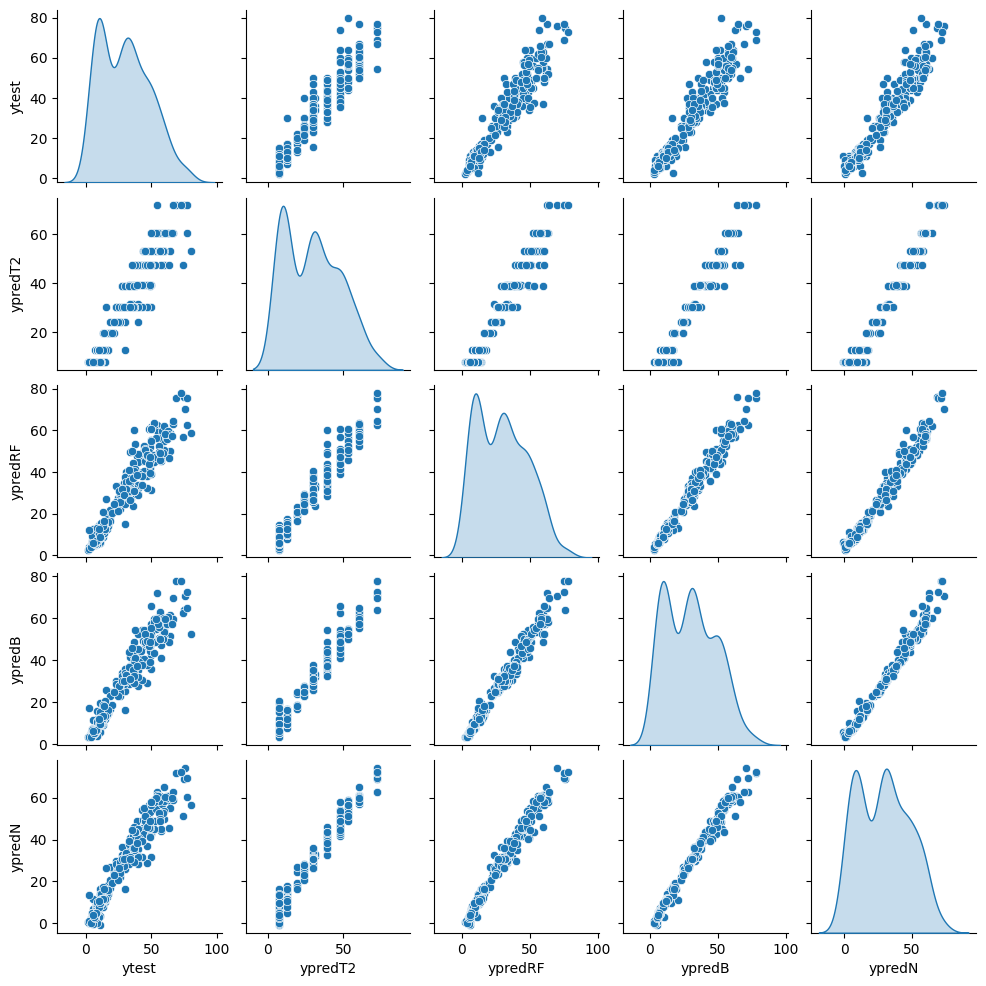

In [32]:
sns.pairplot(ypredDF,diag_kind='kde',height=2)